In [58]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import zscore
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


tickers = [
    "360ONE.NS", "ABB.NS", "APLAPOLLO.NS", "AUBANK.NS", "ADANIENSOL.NS", "ADANIENT.NS",
    "ADANIGREEN.NS", "ADANIPORTS.NS", "ABCAPITAL.NS", "ALKEM.NS", "AMBER.NS", "AMBUJACEM.NS",
    "ANGELONE.NS", "APOLLOHOSP.NS", "ASHOKLEY.NS", "ASIANPAINT.NS", "ASTRAL.NS", "AUROPHARMA.NS",
    "DMART.NS", "AXISBANK.NS", "BSE.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
    "BANDHANBNK.NS", "BANKBARODA.NS", "BANKINDIA.NS", "BDL.NS", "BEL.NS", "BHARATFORG.NS",
    "BHEL.NS", "BPCL.NS", "BHARTIARTL.NS", "BIOCON.NS", "BLUESTARCO.NS", "BOSCHLTD.NS",
    "BRITANNIA.NS", "CGPOWER.NS", "CANBK.NS", "CDSL.NS", "CHOLAFIN.NS", "CIPLA.NS", "COALINDIA.NS",
    "COFORGE.NS", "COLPAL.NS", "CAMS.NS", "CONCOR.NS", "CROMPTON.NS", "CUMMINSIND.NS", "CYIENT.NS",
    "DLF.NS", "DABUR.NS", "DALBHARAT.NS", "DELHIVERY.NS", "DIVISLAB.NS", "DIXON.NS", "DRREDDY.NS",
    "ETERNAL.NS", "EICHERMOT.NS", "EXIDEIND.NS", "NYKAA.NS", "FORTIS.NS", "GAIL.NS", "GMRAIRPORT.NS",
    "GLENMARK.NS", "GODREJCP.NS", "GODREJPROP.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCAMC.NS", 
    "HDFCBANK.NS", "HDFCLIFE.NS", "HFCL.NS", "HAVELLS.NS", "HEROMOTOCO.NS", "HINDALCO.NS", "HAL.NS",
    "HINDPETRO.NS", "HINDUNILVR.NS", "HINDZINC.NS", "POWERINDIA.NS", "HUDCO.NS", "ICICIBANK.NS",
    "ICICIGI.NS", "ICICIPRULI.NS", "IDFCFIRSTB.NS", "IIFL.NS", "ITC.NS", "INDIANB.NS", "IEX.NS",
    "IOC.NS", "IRCTC.NS", "IRFC.NS", "IREDA.NS", "IGL.NS", "INDUSTOWER.NS", "INDUSINDBK.NS",
    "NAUKRI.NS", "INFY.NS", "INOXWIND.NS", "INDIGO.NS", "JINDALSTEL.NS", "JSWENERGY.NS", 
    "JSWSTEEL.NS", "JIOFIN.NS", "JUBLFOOD.NS", "KEI.NS", "KPITTECH.NS", "KALYANKJIL.NS", 
    "KAYNES.NS", "KFINTECH.NS", "KOTAKBANK.NS", "LTF.NS", "LICHSGFIN.NS", "LTIM.NS", "LT.NS",
    "LAURUSLABS.NS", "LICI.NS", "LODHA.NS", "LUPIN.NS", "M&M.NS", "MANAPPURAM.NS", "MANKIND.NS",
    "MARICO.NS", "MARUTI.NS", "MFSL.NS", "MAXHEALTH.NS", "MAZDOCK.NS", "MPHASIS.NS", "MCX.NS",
    "MUTHOOTFIN.NS", "NBCC.NS", "NCC.NS", "NHPC.NS", "NMDC.NS", "NTPC.NS", "NATIONALUM.NS",
    "NESTLEIND.NS", "NUVAMA.NS", "OBEROIRLTY.NS", "ONGC.NS", "OIL.NS", "PAYTM.NS", "OFSS.NS",
    "POLICYBZR.NS", "PGEL.NS", "PIIND.NS", "PNBHOUSING.NS", "PAGEIND.NS", "PATANJALI.NS",
    "PERSISTENT.NS", "PETRONET.NS", "PIDILITIND.NS", "PPLPHARMA.NS", "POLYCAB.NS", "PFC.NS",
    "POWERGRID.NS", "PRESTIGE.NS", "PNB.NS", "RBLBANK.NS", "RECLTD.NS", "RVNL.NS", "RELIANCE.NS",
    "SBICARD.NS", "SBILIFE.NS", "SHREECEM.NS", "SRF.NS", "SAMMAANCAP.NS", "MOTHERSON.NS",
    "SHRIRAMFIN.NS", "SIEMENS.NS", "SOLARINDS.NS", "SONACOMS.NS", "SBIN.NS", "SAIL.NS", 
    "SUNPHARMA.NS", "SUPREMEIND.NS", "SUZLON.NS", "SYNGENE.NS", "TATACONSUM.NS", "TITAGARH.NS",
    "TVSMOTOR.NS", "TCS.NS", "TATAELXSI.NS", "TATAMOTORS.NS", "TATAPOWER.NS", "TATASTEEL.NS",
    "TATATECH.NS", "TECHM.NS", "FEDERALBNK.NS", "INDHOTEL.NS", "PHOENIXLTD.NS", "TITAN.NS",
    "TORNTPHARM.NS", "TORNTPOWER.NS", "TRENT.NS", "TIINDIA.NS", "UNOMINDA.NS", "UPL.NS",
    "ULTRACEMCO.NS", "UNIONBANK.NS", "VBL.NS", "VEDL.NS", "IDEA.NS", "VOLTAS.NS",
    "WIPRO.NS", "YESBANK.NS", "ZYDUSLIFE.NS"
]

ohlc = yf.download(tickers, period="5Y", interval="1d")[['Open', 'High', 'Low', 'Close']]

returns = ohlc['Close'].pct_change()

[*********************100%***********************]  208 of 208 completed


In [64]:
#### Setup (simple swing mean‑reversion):
######• If z‑score < ‑1 → go long next bar open
######• Exit when Close > Open (first green day) or after 5 bars (whichever comes first)

#### Ranking idea:
###### I ran this on each stock and tracked a running Sharpe (up to the day before the signal to avoid look‑ahead). That running Sharpe became the ranking metric.

#### Final test (NIFTY FnO Stocks, historical constituents):
######• Same entry/exit rules
######• Red line: trade only stocks whose running Sharpe > 1 for this strategy; pick the top 10 each day
######• Green line: trade the whole index, simply sorting by z‑score (deeper oversold first)

#### Result (see chart):
######Filtering the universe to stocks that historically respond to mean reversion produced a near‑Sharpe ≈ 1.
######Trading everything by z‑score alone? The equity curve bleeds out—effectively bankrupt.

#### Takeaways:
######• Universe selection is not a footnote; it’s an edge.
######• Signals are name‑dependent—some stocks are mean‑reverters, others are momentum‑driven.
######• Rank by behavioral fit (rolling, out‑of‑sample stats), not just by signal intensity.
######• This is a rich vein for further testing: different lookbacks, decay, re‑ranking cadence, position caps, and risk parity.

In [74]:
holding_period = 5        # bars to hold max
risk_free_rate = 0.06     # annual 6% risk-free rate


returns = ohlc['Close'].pct_change()
zscore_returns = returns.apply(zscore, nan_policy='omit')

# === STRATEGY EXECUTION FUNCTION ===
def run_strategy(ticker):
    data = ohlc.xs(ticker, level=1, axis=1).copy()
    data['zscore'] = zscore_returns[ticker]
    data['signal'] = (data['zscore'] < -1).astype(int)
    data['pnl'] = 0.0

    i = 0
    while i < len(data) - 1:
        if data['signal'].iloc[i] == 1:
            entry_idx = i + 1
            if entry_idx >= len(data):
                break
            entry_price = data['Open'].iloc[entry_idx]
            exit_idx = None

            # exit when close > open (first green day) or after holding_period bars
            for j in range(entry_idx, min(entry_idx + holding_period, len(data))):
                if data['Close'].iloc[j] > data['Open'].iloc[j]:
                    exit_idx = j
                    break
            if exit_idx is None:
                exit_idx = min(entry_idx + holding_period - 1, len(data) - 1)

            exit_price = data['Close'].iloc[exit_idx]
            pnl = (exit_price - entry_price) / entry_price
            data.loc[data.index[exit_idx], 'pnl'] = pnl

            i = exit_idx + 1
        else:
            i += 1

    return data


def performance_metrics(df, ticker):
    trade_pnls = df['pnl'][df['pnl'] != 0].dropna()
    if len(trade_pnls) == 0:
        return pd.Series({
            'Ticker': ticker,
            'Total Trades': 0,
            'CAGR (%)': 0,
            'Total Return (%)': 0,
            'Max DD (%)': 0,
            'Sharpe': 0
        })

    df['equity'] = (1 + df['pnl']).cumprod()
    total_return = df['equity'].iloc[-1] - 1
    days = (df.index[-1] - df.index[0]).days
    cagr = (df['equity'].iloc[-1]) ** (252 / days) - 1 if days > 0 else 0

    roll_max = df['equity'].cummax()
    drawdown = (df['equity'] / roll_max - 1)
    max_dd = drawdown.min()

    daily_ret = df['equity'].pct_change().dropna()
    sharpe = ((daily_ret.mean() - risk_free_rate / 252) / daily_ret.std()) * np.sqrt(252)

    return pd.Series({
        'Ticker': ticker,
        'Total Trades': len(trade_pnls),
        'CAGR (%)': cagr * 100,
        'Total Return (%)': total_return * 100,
        'Max DD (%)': max_dd * 100,
        'Sharpe': sharpe
    })


all_results = {}
perf_list = []

for ticker in tickers:
    try:
        df = run_strategy(ticker)
        all_results[ticker] = df
        perf = performance_metrics(df, ticker)
        perf_list.append(perf)
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

perf_df = pd.DataFrame(perf_list).set_index('Ticker')
perf_df = perf_df.sort_values('Sharpe', ascending=False)

print("FULL PERFORMANCE TABLE")
print(perf_df.head(20).round(2))

FULL PERFORMANCE TABLE
               Total Trades  CAGR (%)  Total Return (%)  Max DD (%)  Sharpe
Ticker                                                                     
RVNL.NS                  88     15.53            184.23      -23.50    0.98
PHOENIXLTD.NS           143     12.36            132.49      -14.73    0.82
IDEA.NS                  94     15.59            185.33      -16.78    0.78
IDFCFIRSTB.NS           105     10.87            111.05      -17.46    0.77
MAZDOCK.NS               94     11.84            124.84      -19.36    0.70
DLF.NS                  129      9.58             93.87      -24.34    0.63
KEI.NS                  103     11.08            113.94      -30.69    0.63
RBLBANK.NS              111      9.97             98.98      -14.36    0.57
CHOLAFIN.NS             127      9.51             92.96      -18.53    0.55
BEL.NS                  105      8.15             76.35      -14.64    0.52
MFSL.NS                 132      8.32             78.32      -22.

In [75]:
print("TOP 10 STOCKS BY SHARPE")
print(perf_df.head(20).round(2))

TOP 10 STOCKS BY SHARPE
               Total Trades  CAGR (%)  Total Return (%)  Max DD (%)  Sharpe
Ticker                                                                     
RVNL.NS                  88     15.53            184.23      -23.50    0.98
PHOENIXLTD.NS           143     12.36            132.49      -14.73    0.82
IDEA.NS                  94     15.59            185.33      -16.78    0.78
IDFCFIRSTB.NS           105     10.87            111.05      -17.46    0.77
MAZDOCK.NS               94     11.84            124.84      -19.36    0.70
DLF.NS                  129      9.58             93.87      -24.34    0.63
KEI.NS                  103     11.08            113.94      -30.69    0.63
RBLBANK.NS              111      9.97             98.98      -14.36    0.57
CHOLAFIN.NS             127      9.51             92.96      -18.53    0.55
BEL.NS                  105      8.15             76.35      -14.64    0.52
MFSL.NS                 132      8.32             78.32      -22

In [76]:
def portfolio_perf(top_n):
    top_tickers = perf_df.head(top_n).index
    eq = pd.DataFrame({t: all_results[t]['pnl'] for t in top_tickers}).fillna(0)
    port_eq = (1 + eq.mean(axis=1)).cumprod()

    days = (port_eq.index[-1] - port_eq.index[0]).days
    cagr = (port_eq.iloc[-1]) ** (252 / days) - 1 if days > 0 else 0

    roll_max = port_eq.cummax()
    dd = port_eq / roll_max - 1
    max_dd = dd.min()

    daily_ret = port_eq.pct_change().dropna()
    sharpe = ((daily_ret.mean() - risk_free_rate / 252) / daily_ret.std()) * np.sqrt(252)
    total_return = port_eq.iloc[-1] - 1

    return {
        'Portfolio Size': top_n,
        'CAGR (%)': cagr * 100,
        'Total Return (%)': total_return * 100,
        'Max DD (%)': max_dd * 100,
        'Sharpe': sharpe
    }

sizes = [ 5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
portfolio_summary = pd.DataFrame([portfolio_perf(n) for n in sizes]).set_index('Portfolio Size')

print("PORTFOLIO PERFORMANCE BY SIZE")
print(portfolio_summary.round(2))

PORTFOLIO PERFORMANCE BY SIZE
                CAGR (%)  Total Return (%)  Max DD (%)  Sharpe
Portfolio Size                                                
5                  14.14            160.51       -5.46    1.69
10                 12.31            131.68       -4.52    1.90
20                 10.24            102.57       -3.19    1.91
30                  8.95             85.97       -3.09    1.70
40                  8.16             76.41       -2.77    1.54
50                  7.58             69.66       -3.01    1.43
70                  6.66             59.47       -3.35    1.03
80                  6.28             55.41       -3.23    0.92
90                  5.93             51.73       -3.26    0.81
100                 5.56             47.96       -3.82    0.65


[*********************100%***********************]  1 of 1 completed


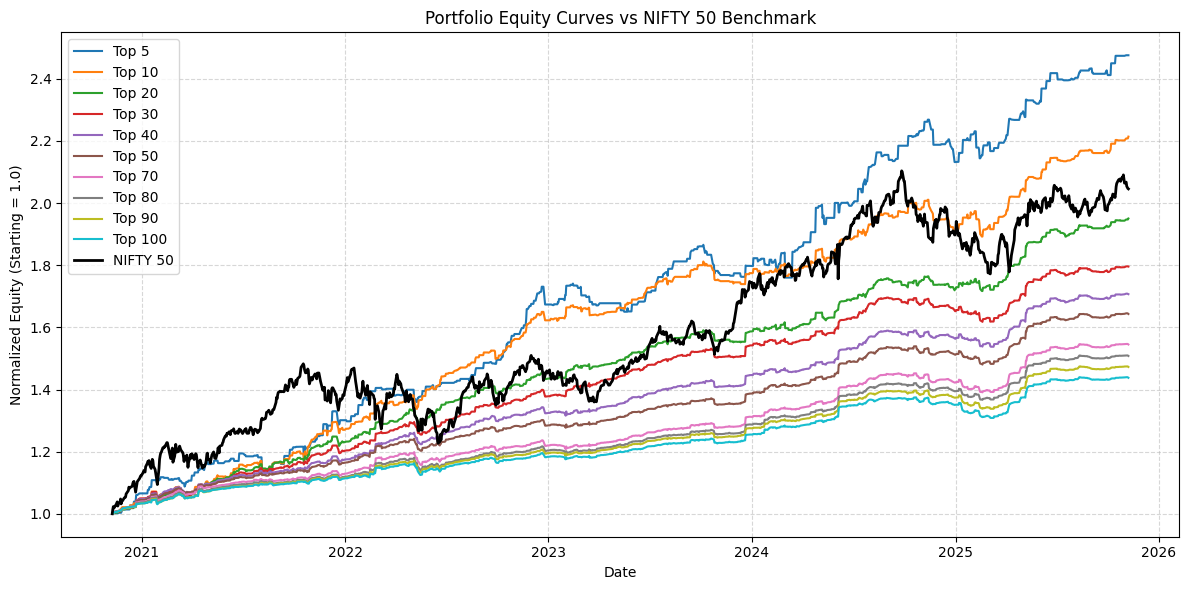

In [77]:
nifty = yf.download("^NSEI", period="5y", interval="1d")[['Close']]
nifty['Benchmark'] = nifty['Close'] / nifty['Close'].iloc[0]  # normalize to 1

portfolio_equities = {}

for n in [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]:
    top_n_tickers = perf_df.head(n).index
    combined_eq = []

    for t in top_n_tickers:
        df = all_results[t].copy()
        
        if 'equity' not in df.columns:
            df['equity'] = (1 + df['pnl']).cumprod()
        combined_eq.append(df['equity'])

    if len(combined_eq) == 0:
        continue

    combined = pd.concat(combined_eq, axis=1).fillna(method='ffill')
    combined.columns = top_n_tickers
    combined['Portfolio'] = combined.mean(axis=1)
    portfolio_equities[n] = combined['Portfolio']

# --- Plot Portfolio Equity vs NIFTY ---
plt.figure(figsize=(12, 6))
for n, eq in portfolio_equities.items():
    plt.plot(eq.index, eq / eq.iloc[0], label=f"Top {n}")


plt.plot(nifty.index, nifty['Benchmark'], label='NIFTY 50', color='black', linewidth=2, linestyle='-')

plt.title("Portfolio Equity Curves vs NIFTY 50 Benchmark")
plt.xlabel("Date")
plt.ylabel("Normalized Equity (Starting = 1.0)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
